In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from  torch.utils.data import DataLoader
from torchvision import transforms, datasets,models
import os

In [2]:
train_path = '/content/drive/MyDrive/image_dataset/dataset/Images/Train'
test_path = '/content/drive/MyDrive/image_dataset/dataset/Images/Test'

In [3]:
train_data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomHorizontalFlip()
])

test_data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomHorizontalFlip()
])

In [4]:
train_dataset = datasets.ImageFolder(train_path, transform=train_data_transforms)
test_dataset = datasets.ImageFolder(test_path, transform=test_data_transforms)

train_loader = DataLoader(train_dataset, batch_size= 32, shuffle= True)
test_loader = DataLoader(test_dataset, batch_size= 32, shuffle= False)


In [5]:
import torchvision
import warnings
warnings.filterwarnings('ignore')

In [6]:
label_to_name = {0 : 'Audi', 1: 'Lamborghini', 2:'Mercedes'}
def show_image(dataset, label_to_name):
  batch = next(iter(dataset))
  images, labels = batch
  grid = torchvision.utils.make_grid(images)
  plt.figure(figsize=(10,10))
  plt.imshow(np.transpose(grid, (1,2,0)))

  labels_names = [label_to_name[label.item()] for label in labels]
  print('labels:', labels_names)
  plt.show()

labels: ['Audi', 'Audi', 'Lamborghini', 'Lamborghini', 'Audi', 'Audi', 'Mercedes', 'Lamborghini', 'Mercedes', 'Audi', 'Mercedes', 'Mercedes', 'Mercedes', 'Lamborghini', 'Audi', 'Lamborghini', 'Audi', 'Audi', 'Lamborghini', 'Mercedes', 'Audi', 'Mercedes', 'Lamborghini', 'Mercedes', 'Audi', 'Mercedes', 'Mercedes', 'Lamborghini', 'Audi', 'Mercedes', 'Audi', 'Lamborghini']


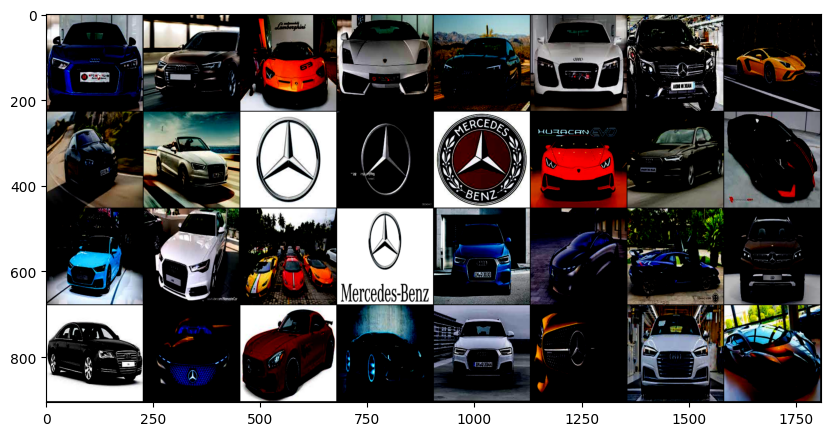

In [8]:
show_image(train_loader, label_to_name)

In [9]:
# Load the pretrained model

model = models.resnet18(pretrained = True)
model.fc = nn.Linear(model.fc.in_features, 3)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]


In [14]:
# Define the loss function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001 )

In [15]:
# Training the loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 10

for epoch in range(num_epochs):
  running_loss = 0.0

  for inputs, labels in train_loader:
    optimizer.zero_grad()
    inputs, labes = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f'Epoch {epoch +1 } /{num_epochs}, loss: {running_loss}/ {len(train_loader):.3f}')



Epoch 1 /10, loss: 2.4843894839286804/ 2.000
Epoch 2 /10, loss: 2.260284900665283/ 2.000
Epoch 3 /10, loss: 0.07772927172482014/ 2.000
Epoch 4 /10, loss: 0.058186993934214115/ 2.000
Epoch 5 /10, loss: 0.3019244000315666/ 2.000
Epoch 6 /10, loss: 0.2874150648713112/ 2.000
Epoch 7 /10, loss: 0.14327681809663773/ 2.000
Epoch 8 /10, loss: 0.04796776734292507/ 2.000
Epoch 9 /10, loss: 0.025902113877236843/ 2.000
Epoch 10 /10, loss: 0.011757726082578301/ 2.000


In [16]:
model.eval()

with torch.no_grad():
  correct = 0
  total = 0
  for inputs , labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    output = model(inputs)
    _, predicted = torch.max(output.data,1)
    total+= labels.size(0)
    correct += (predicted == labels).sum().item()

  print(f'Accuracy of the test images {100 * correct / total}%')
  #print(predicted)
  #print(labels)

Accuracy of the test images 87.93103448275862%


In [21]:
from torchsummary import summary

summary(model, input_size=(3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [17]:
# Define the transformations (same as used during training)
from PIL import Image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomHorizontalFlip()
])

def load_image(image_path):
    image = Image.open(image_path)  # Load the image
    image = preprocess(image)       # Apply the preprocessing transformations
    image = image.unsqueeze(0)      # Add a batch dimension
    return image



In [18]:
model.eval()

def predict(image_tensor):
    with torch.no_grad():  # Disable gradient calculation
        outputs = model(image_tensor)  # Get model outputs
        _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
    return predicted.item()

# Load and preprocess the image
image_path = '/content/drive/MyDrive/image_dataset/dataset/Images/Test/lamborghini/10.jpg'
image_tensor = load_image(image_path)

# Get the prediction
prediction = predict(image_tensor)
print(f'Predicted class: {prediction}')


Predicted class: 1


In [19]:
# Example mapping from class indices to class names
class_names = ['Audi', 'Lamboghini', 'Mercedes']

# Print the predicted class name
predicted_class_name = class_names[prediction]
print(f'Predicted class name: {predicted_class_name}')


Predicted class name: Lamboghini


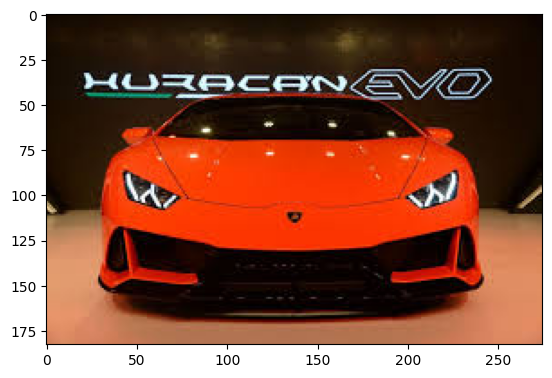

In [20]:
img = Image.open(image_path)
plt.imshow(img)
plt.show()

In [ ]:
from torchvision import transforms
from PIL import Image

# Load an image using PIL
image = Image.open('/content/drive/MyDrive/image_dataset/dataset/Images/Train/audi/1.jpg')

# Convert to tensor to use with torchvision
transform = transforms.Compose([transforms.ToTensor()])
tensor_image = transform(image)

# Get the shape of the image
print(tensor_image.shape)  # Output will be (C, H, W)


torch.Size([3, 183, 275])
